# Stroke EDA

- stroke = avc
- EDA = Exploratory Data Analysis

In [1]:
### library/modules = toolbox

import pandas as pd ## traitement de tables
import numpy as np ## fonction math+ listes améliorées

import seaborn as sns ## visu
import matplotlib.pyplot as plt ## visu


In [2]:
### load data

data = pd.read_csv('data/stroke.csv') #pd.read_csv('data/stroke.csv', index_col='id') #features
#data

In [3]:
### data preview
display(data.head(3))
display(data.tail(4))

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# EDA : Exploratiory Data Analysis

Understand and explore the data, as it currently is

Must be done, before machine leanring: 
- see if clean
- see types of features
- see understand features
- can features be cut/deleted to prevent bloat ?

source dataset: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

## 1. Format-analysis

In [4]:
data.dtypes ## type données encodées =!= type de variable statistiques (voir plus bas)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
INFO = pd.concat([data.dtypes, data.isna().sum(),data.nunique()], axis = 1)
INFO.columns = ['dtypes','isna_sum','nunique']
INFO


,dtypes,isna_sum,nunique
id,int64,0,5110
gender,object,0,3
age,float64,0,104
hypertension,int64,0,2
heart_disease,int64,0,2
ever_married,object,0,2
work_type,object,0,5
Residence_type,object,0,2
avg_glucose_level,float64,0,3979
bmi,float64,201,418


In [7]:
data.shape

(5110, 12)

In [8]:
### posibility to change datatypes to reduce memory usage and be more efficent when calculating results
data_temp = data.copy()
data_temp['stroke'] = data_temp['stroke'].astype('category') ### bool,'category'

data_temp.dtypes

id                      int64
gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke               category
dtype: object

In [9]:
data_temp['stroke'].head(3)

0    1
1    1
2    1
Name: stroke, dtype: category
Categories (2, int64): [0, 1]

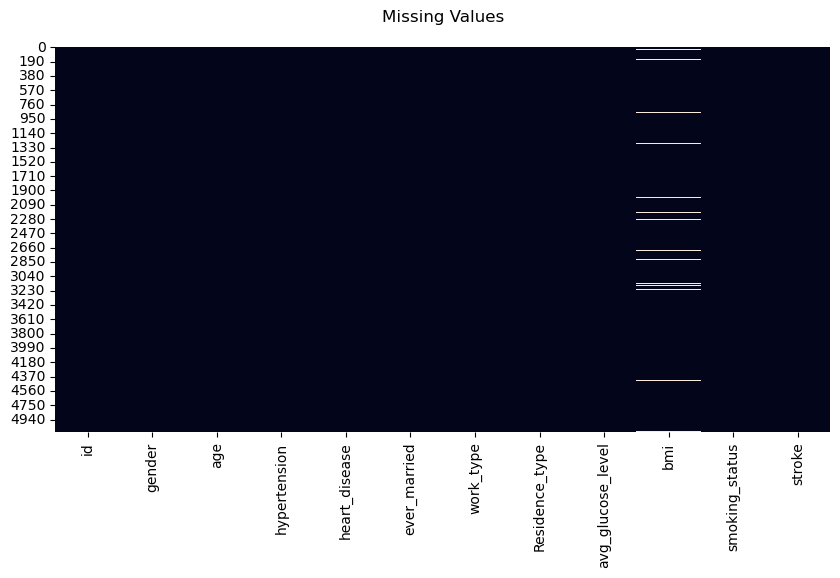

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
plt.figure(figsize=(10, 5))

plt.title('Missing Values\n')

sns.heatmap(data.isnull(), cbar=False)
plt.show()

data.isnull().sum()

## 2. Univariate content-analysis

Analyse content, one column at a time (ignoring the others)

### 2.a. Target analysis
specific analysis of the center of study/prediction

In [11]:
### referencing for systematic use of this template
target = 'stroke'

In [12]:
data[target].unique() ## quel type de variable statistique ? Booléen, Categorie !

array([1, 0], dtype=int64)

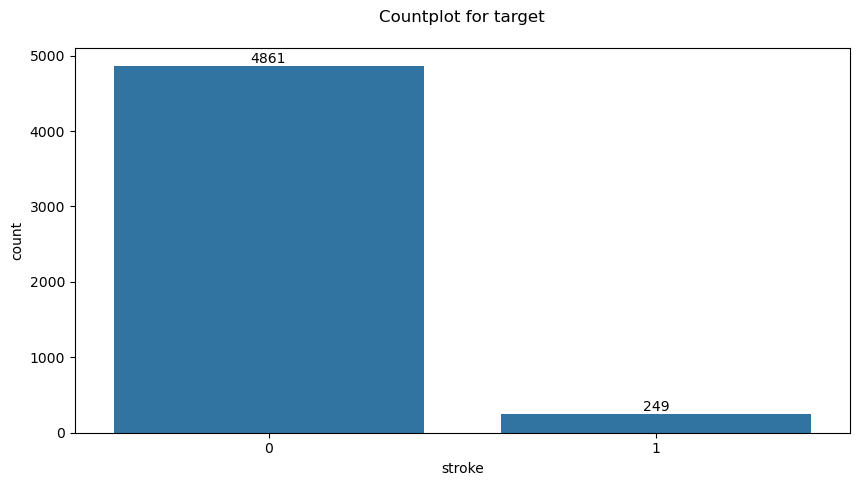

stroke
0    4861
1     249
Name: count, dtype: int64


In [13]:
### recommendations:
### if the column is a categorical variable: -> barplot for visualisation
### if the column is a numerical variable: -> histogram for visualisation

plt.figure(figsize=(10, 5))
plt.title('Countplot for target\n')

ax = sns.countplot(data=data, x=target) # countplot = barplot, count, pas de groupby à faire

### show the data-labels for each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()



### show same info but in a table/list/series
print(data[target].value_counts())


In [14]:
### elementary statistics

data[[target]].describe() ## int / bool -> somme et/ou moyenne possible

,stroke
count,5110.000000
mean,0.048728
std,0.215320
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [15]:
data[[target]].astype('category').describe()

,stroke
count,5110
unique,2
top,0
freq,4861


### 2.b. Features analysis: setup

features == explicative columns

In [16]:
feat_cols = data.columns.to_list() 
feat_cols.remove(target)
feat_cols

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [17]:
### CRITICAL USER INPUT

### segregation of features into relevant groups of statistical variables
### use documentation, column names to infer: verify/confirm with univariate analysis

### ordinal_categorical
ord_cols = ['smoking_status',] 

### nominal_categorical (dichotomical (2-possible values) variables are ok here)
nom_cols = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',] 

### all_categorical together
cat_cols = ord_cols + nom_cols 


### discrete_numerical
dis_cols = []

### continuous_numerical
con_cols = ['id', 'age', 'avg_glucose_level', 'bmi']
### id in principle is a nominal categorical because is simply a label: doesnt represent an aggregation
### in principle, id contain no statistical information
### id placed here because is an int with high cardinality/number of uniques

### all numerical 
num_cols = dis_cols + con_cols



In [18]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### 2.c. Categorical features

In [19]:
cat_cols

['smoking_status',
 'gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type']

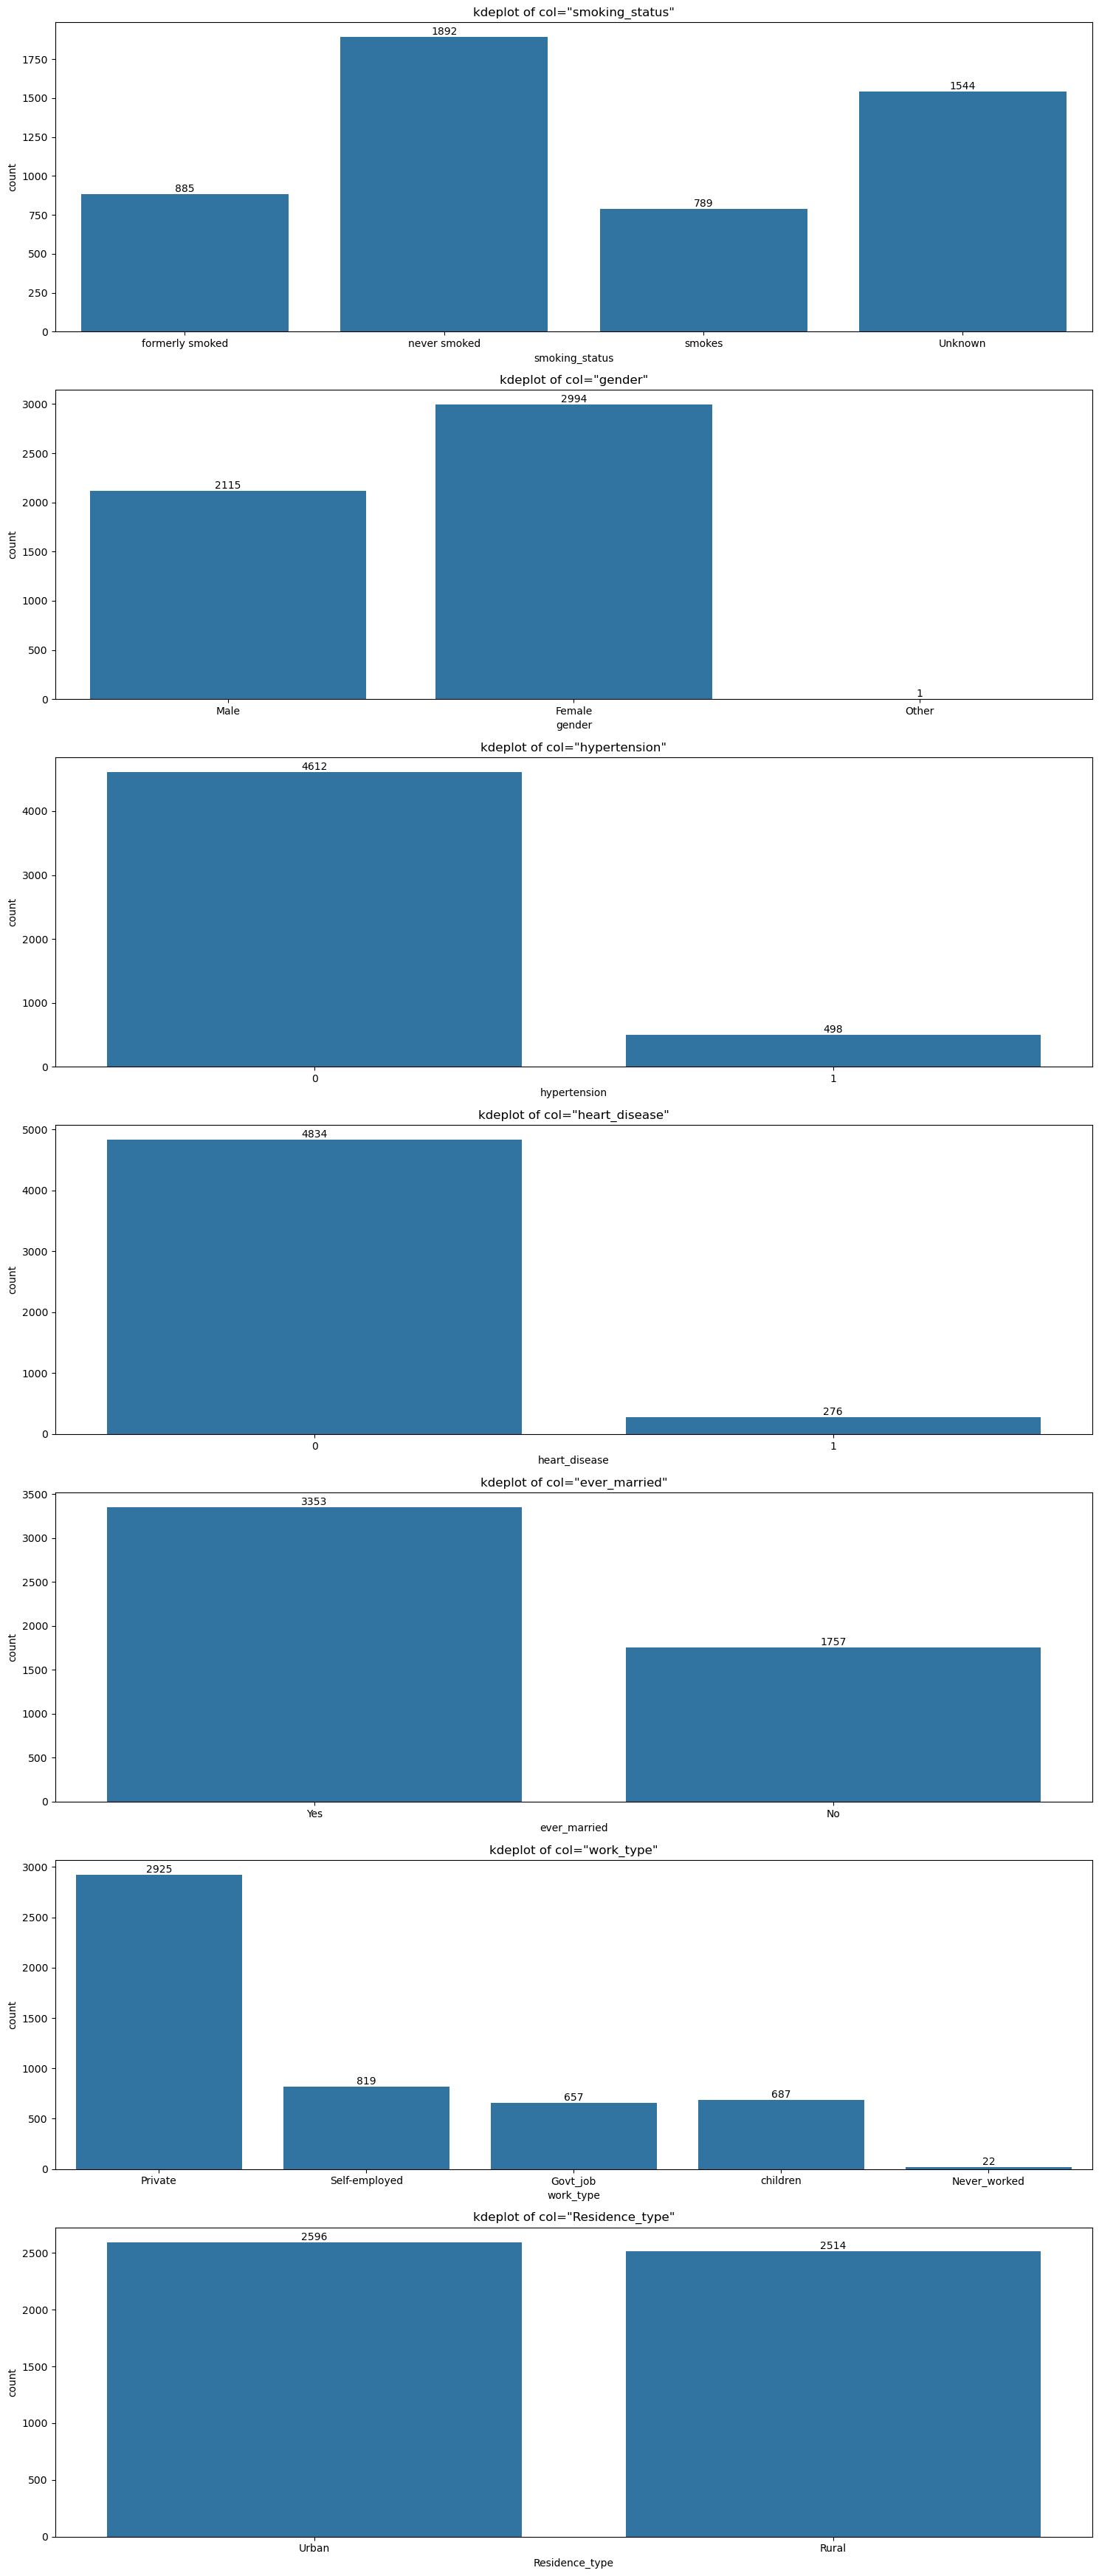

In [20]:
### number of numerical features
N_cat = len(cat_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_cat)) 

### for each categorical feature plot a 'countplot'
for i in np.arange(N_cat):
    col = cat_cols[i]
    
    plt.subplot(N_cat, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### countplot
    ax = sns.countplot(data=data, x=col) 
    ### show the data-labels for each bar
    for container in ax.containers:
        ax.bar_label(container)
        
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

In [21]:
display(data[cat_cols].astype('category').describe().T)

,count,unique,top,freq
smoking_status,5110,4,never smoked,1892
gender,5110,3,Female,2994
hypertension,5110,2,0,4612
heart_disease,5110,2,0,4834
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596


In [22]:
display(data[cat_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
hypertension,5110.0,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0


In [23]:
display(data[cat_cols].describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
smoking_status,5110,4,never smoked,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.d. Numerical features

In [24]:
num_cols

['id', 'age', 'avg_glucose_level', 'bmi']

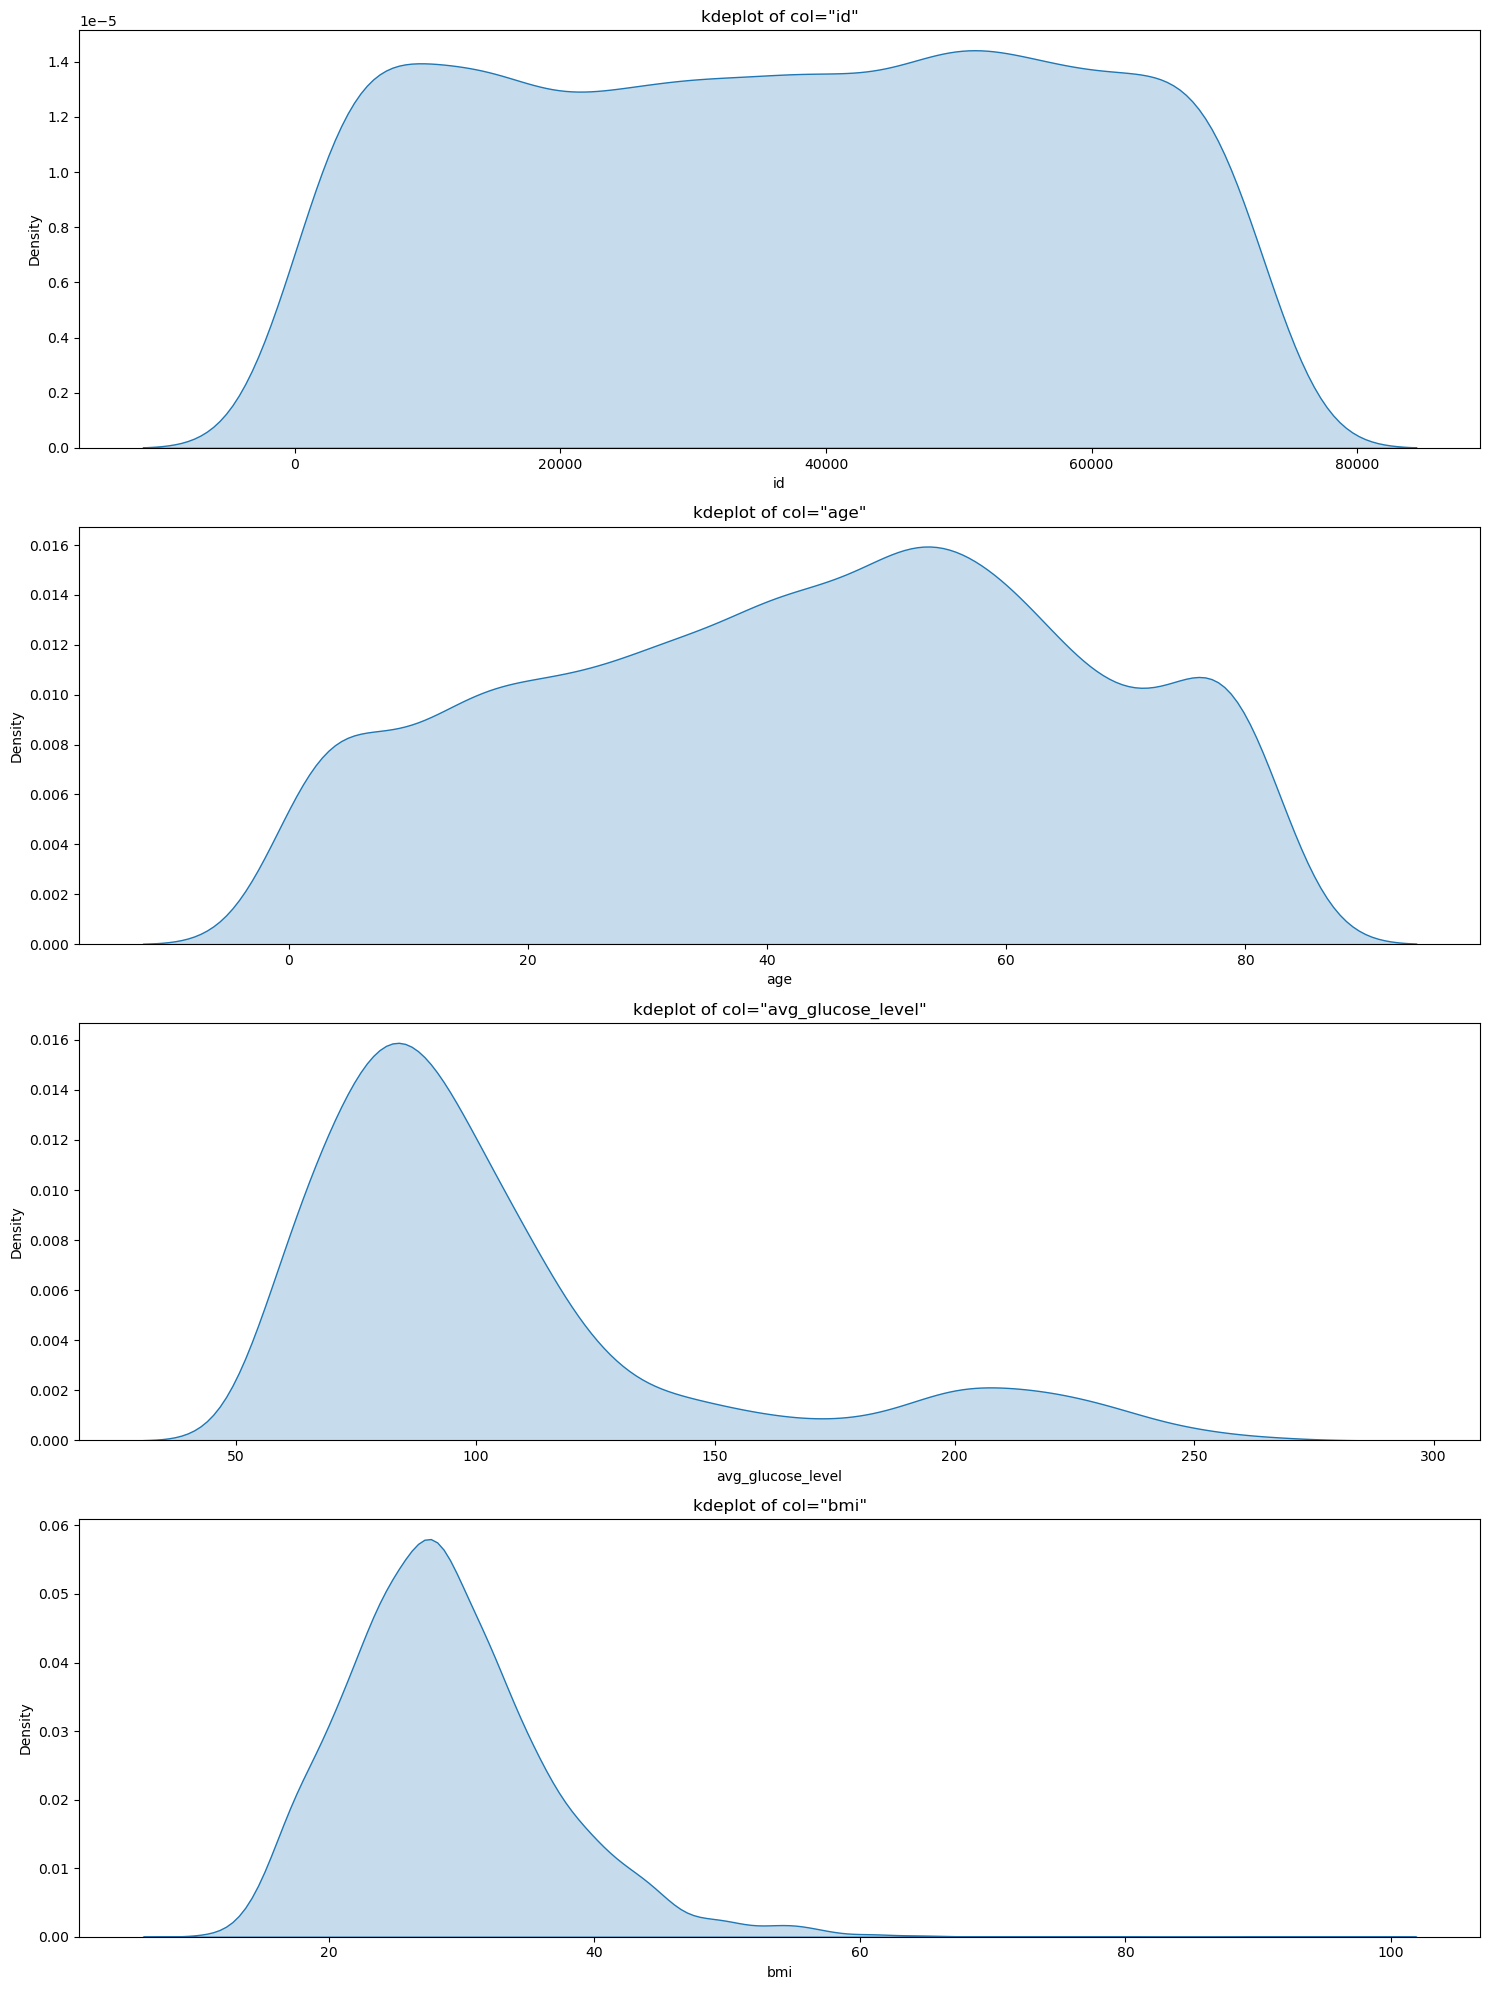

In [25]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'kdeplot'
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### Kernel Density Estimator +-= smoothed histogram
    sns.kdeplot(data=data, x=col, fill=True) 

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

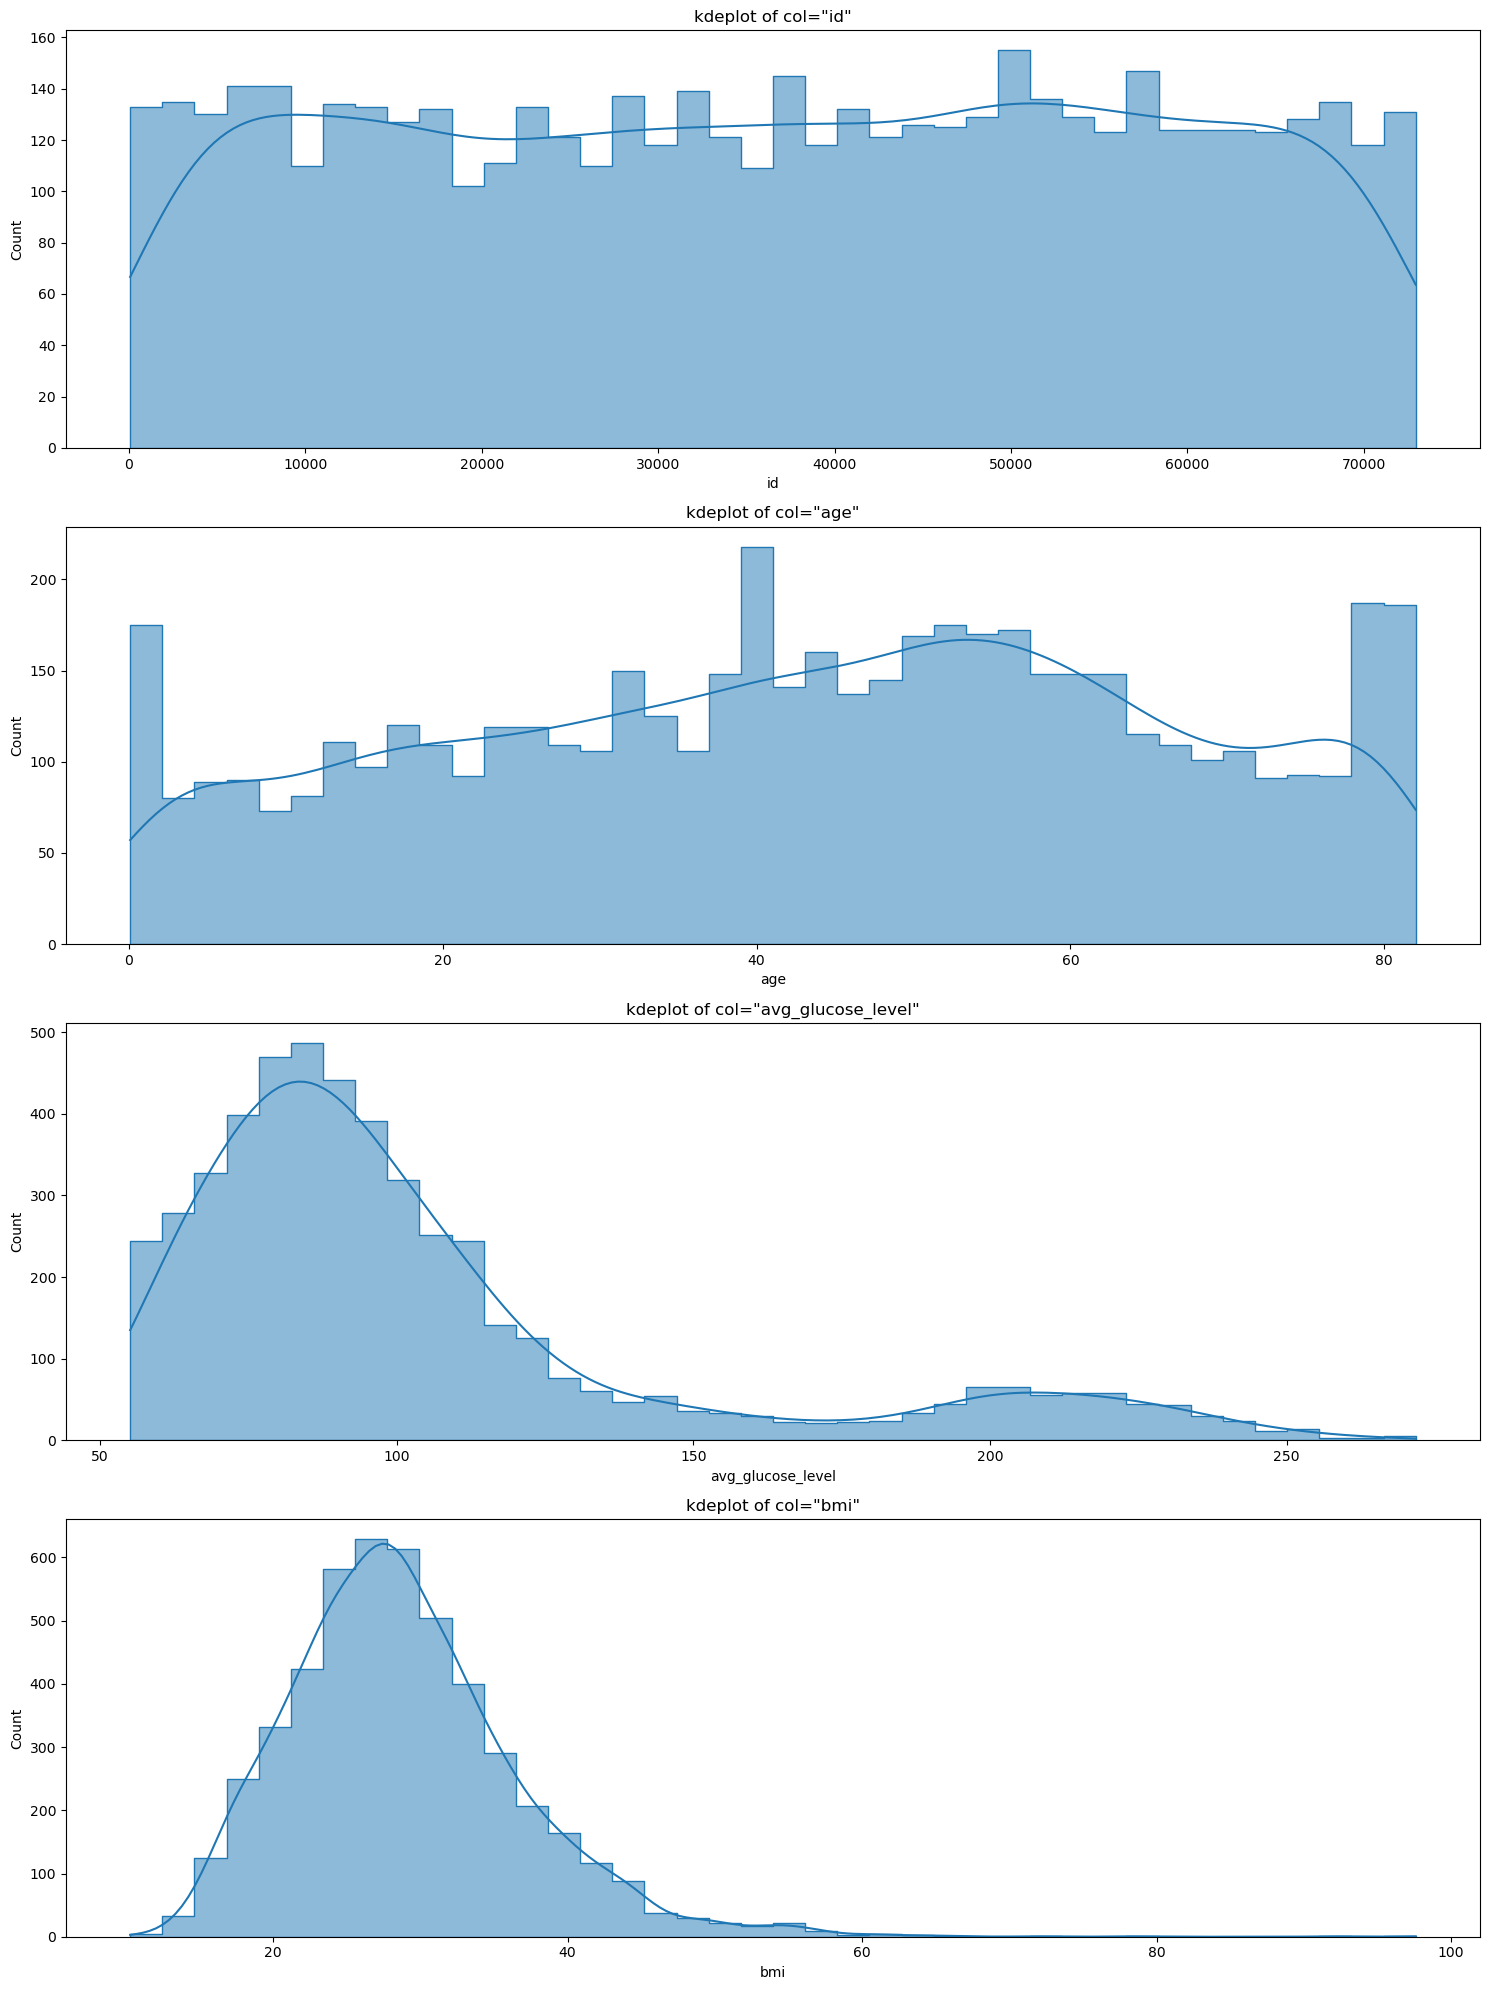

In [26]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### simple histogram
    sns.histplot(data=data, x=col
                      , fill=True
                      , element="step"
                      , stat = 'count' # 'count','density','percent', ...
                      , discrete=False
                      , kde=True
                      , bins=40
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

In [27]:
display(data[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


## 3. Bivariate content analysis: features vs target


### 3.a.  Categorical vs target


recommendations:  
__feature vs target:__
- _categorical vs categorical:_  
        barplot/countplot of feature,  
        color/hue based on target values  
        
        groupby(target)

- _categorical vs numerical:_  
        histogram of target,  
        color/hue based on feature   
        
        groupby(feature)

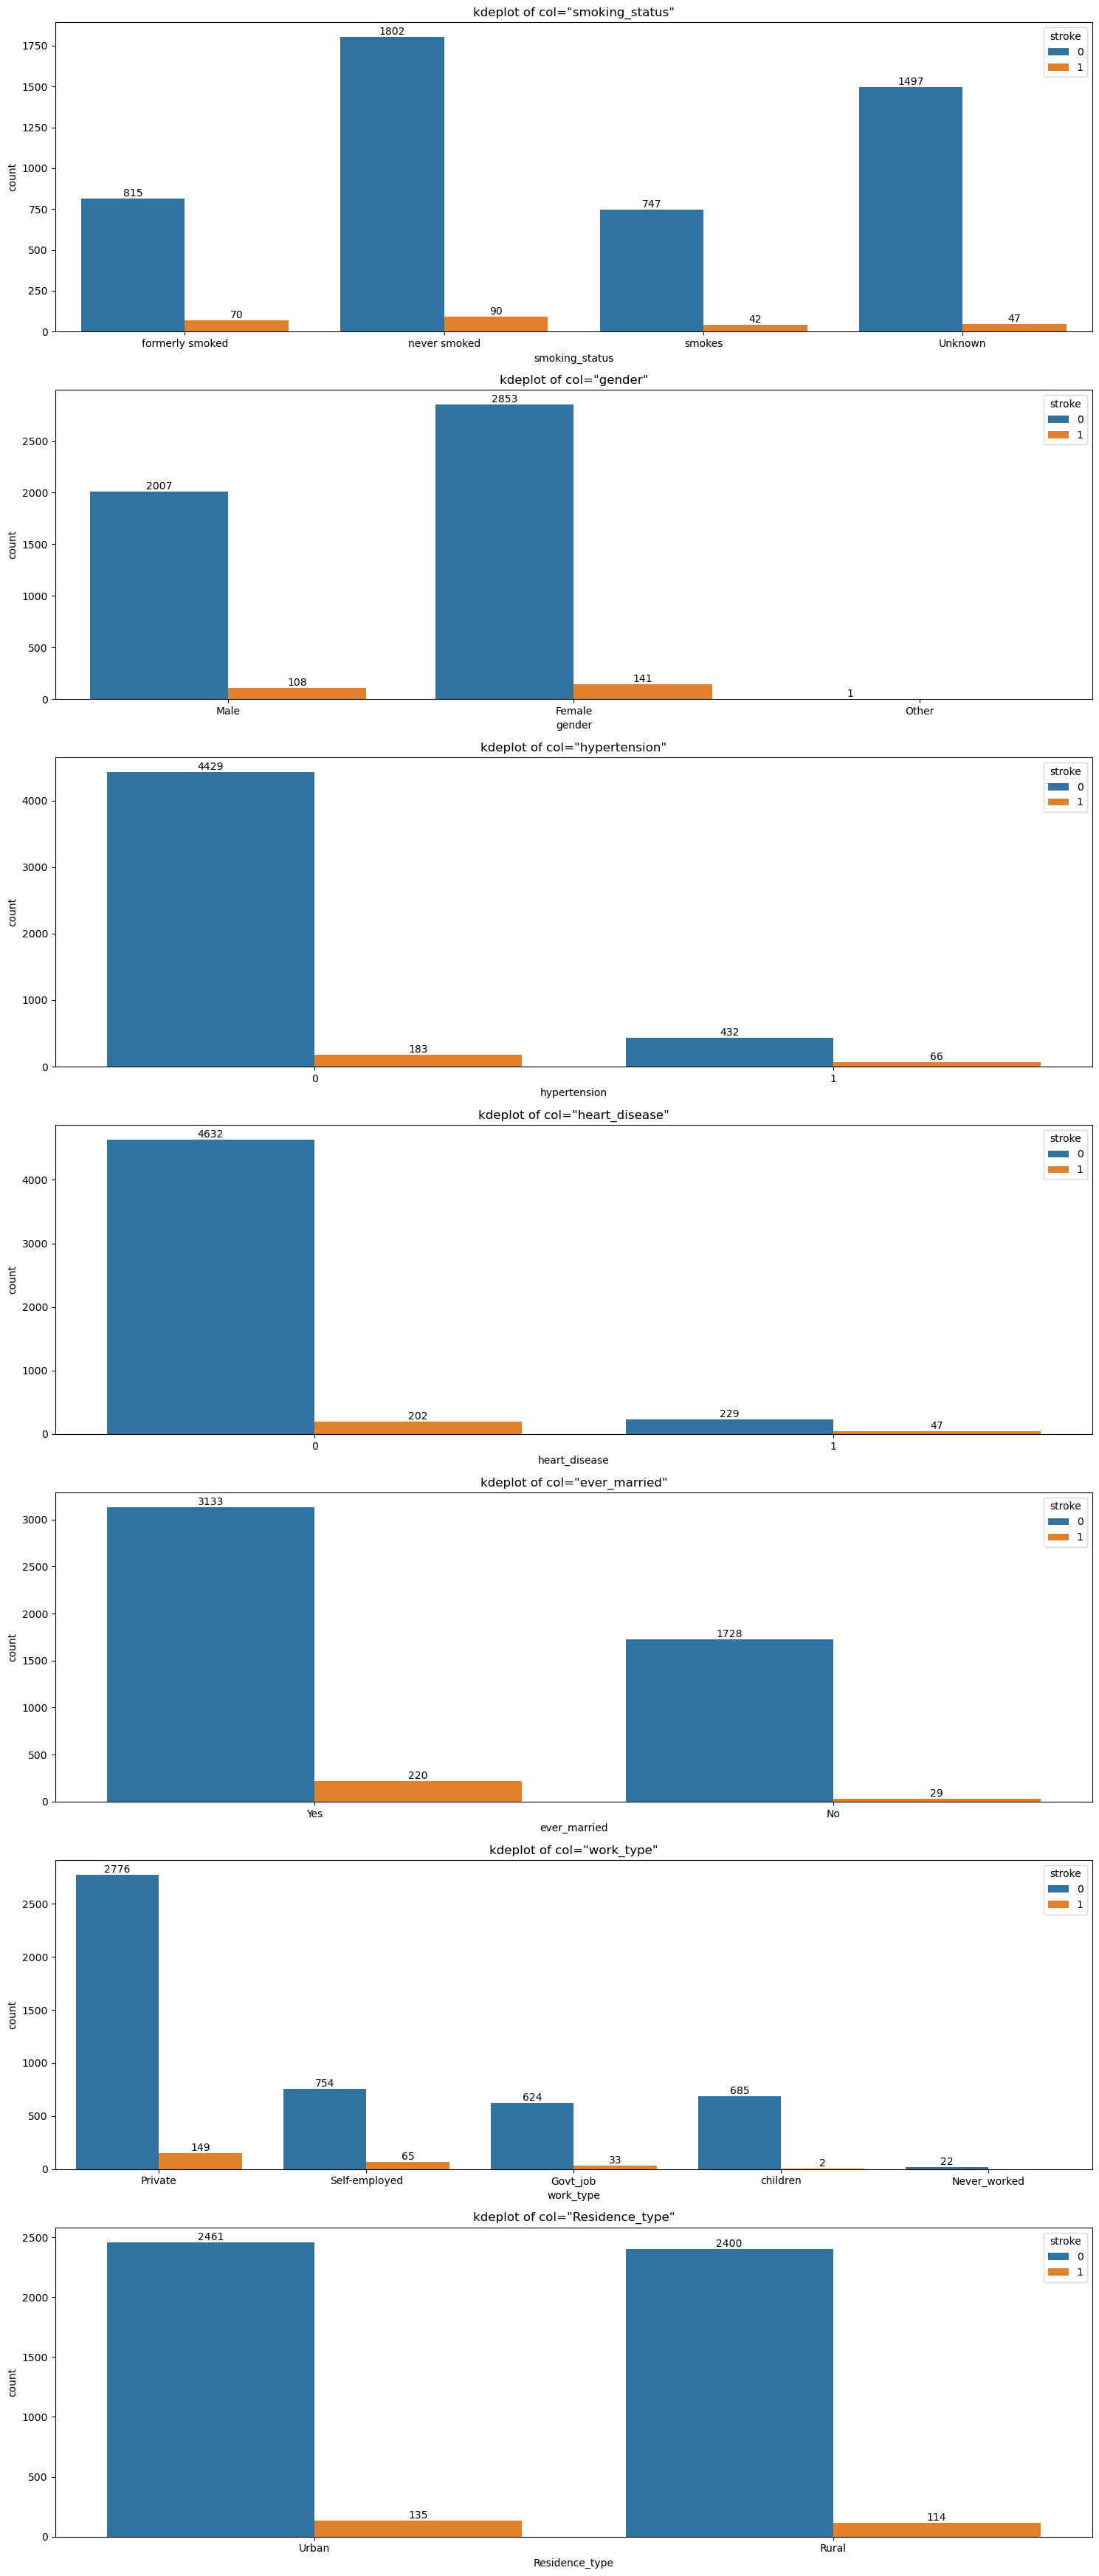

In [28]:
### number of numerical features
N_cat = len(cat_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_cat)) 

### for each categorical feature plot a 'countplot'
for i in np.arange(N_cat):
    col = cat_cols[i]
    
    plt.subplot(N_cat, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### countplot
    ax = sns.countplot(data=data, x=col, hue=target) ## hue=teinte/couleur
    ### show the data-labels for each bar
    for container in ax.containers:
        ax.bar_label(container)
        
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

,heart_disease,stroke,count
0,0,0,4632
1,0,1,202
2,1,0,229
3,1,1,47


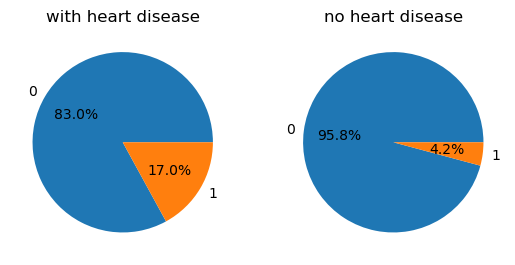

In [29]:
GB1 = data[[target,'heart_disease']].groupby(['heart_disease'
                                              ,target]).agg({target:'count'})
GB1.columns = ['count']
GB1.reset_index(inplace=True)
display(GB1)

GB1_heart_dis = GB1[GB1['heart_disease']==1]
GB1_no_heart_dis = GB1[GB1['heart_disease']!=1]


plt.subplot(1,2,1)
plt.title('with heart disease')
plt.pie(x= GB1_heart_dis['count'] ,labels=GB1_heart_dis['stroke'], autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title('no heart disease')
plt.pie(x= GB1_no_heart_dis['count'] ,labels=GB1_no_heart_dis['stroke'], autopct='%1.1f%%')
plt.show()

In [30]:
### groupby-statistics

for col in cat_cols:
    display(data[[col,target]].astype('category').groupby(target,observed=False).describe())

smoking_status                           
                count unique           top  freq
stroke                                          
0                4861      4  never smoked  1802
1                 249      4  never smoked    90

gender                     
        count unique     top  freq
stroke                            
0        4861      3  Female  2853
1         249      2  Female   141

hypertension                 
              count unique top  freq
stroke                              
0              4861      2   0  4429
1               249      2   0   183

heart_disease                 
               count unique top  freq
stroke                               
0               4861      2   0  4632
1                249      2   0   202

ever_married                  
              count unique  top  freq
stroke                               
0              4861      2  Yes  3133
1               249      2  Yes   220

work_type                      
           count unique      top  freq
stroke                                
0           4861      5  Private  2776
1            249      4  Private   149

Residence_type                    
                count unique    top  freq
stroke                                   
0                4861      2  Urban  2461
1                 249      2  Urban   135

__alternative visualisations: crosstab__


In [31]:
pd.crosstab(data['gender'], data['stroke']) ## contingency-table/pivot

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


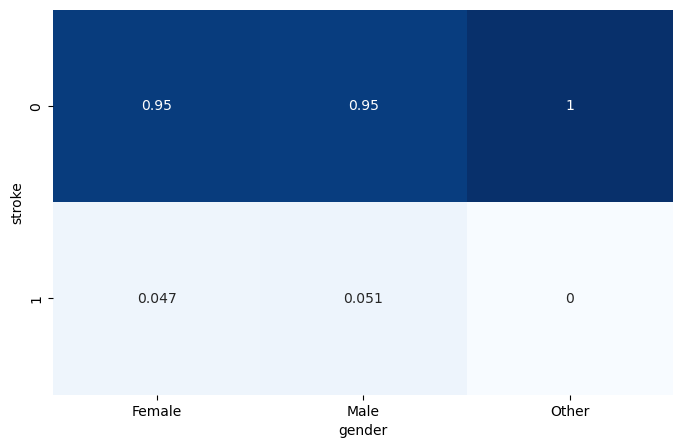

In [32]:
crosstab = pd.crosstab(data['stroke'], data['gender'], normalize='columns')#.drop(index='Other')
plt.figure(figsize=(8,5))
sns.heatmap(crosstab, annot=True, cmap='Blues', cbar=False)
plt.show()

### 3.b. Numerical vs target


recommendations:  
__feature vs target:__
- _numerical vs categorical:_  
        histogram of feature,  
        color/hue based on target 
        
        groupby(target)
    

- _numerical vs numerical:_  
        scatter/pair plot with 
        feature on x-axis, target on y-axis
        
        no groupby

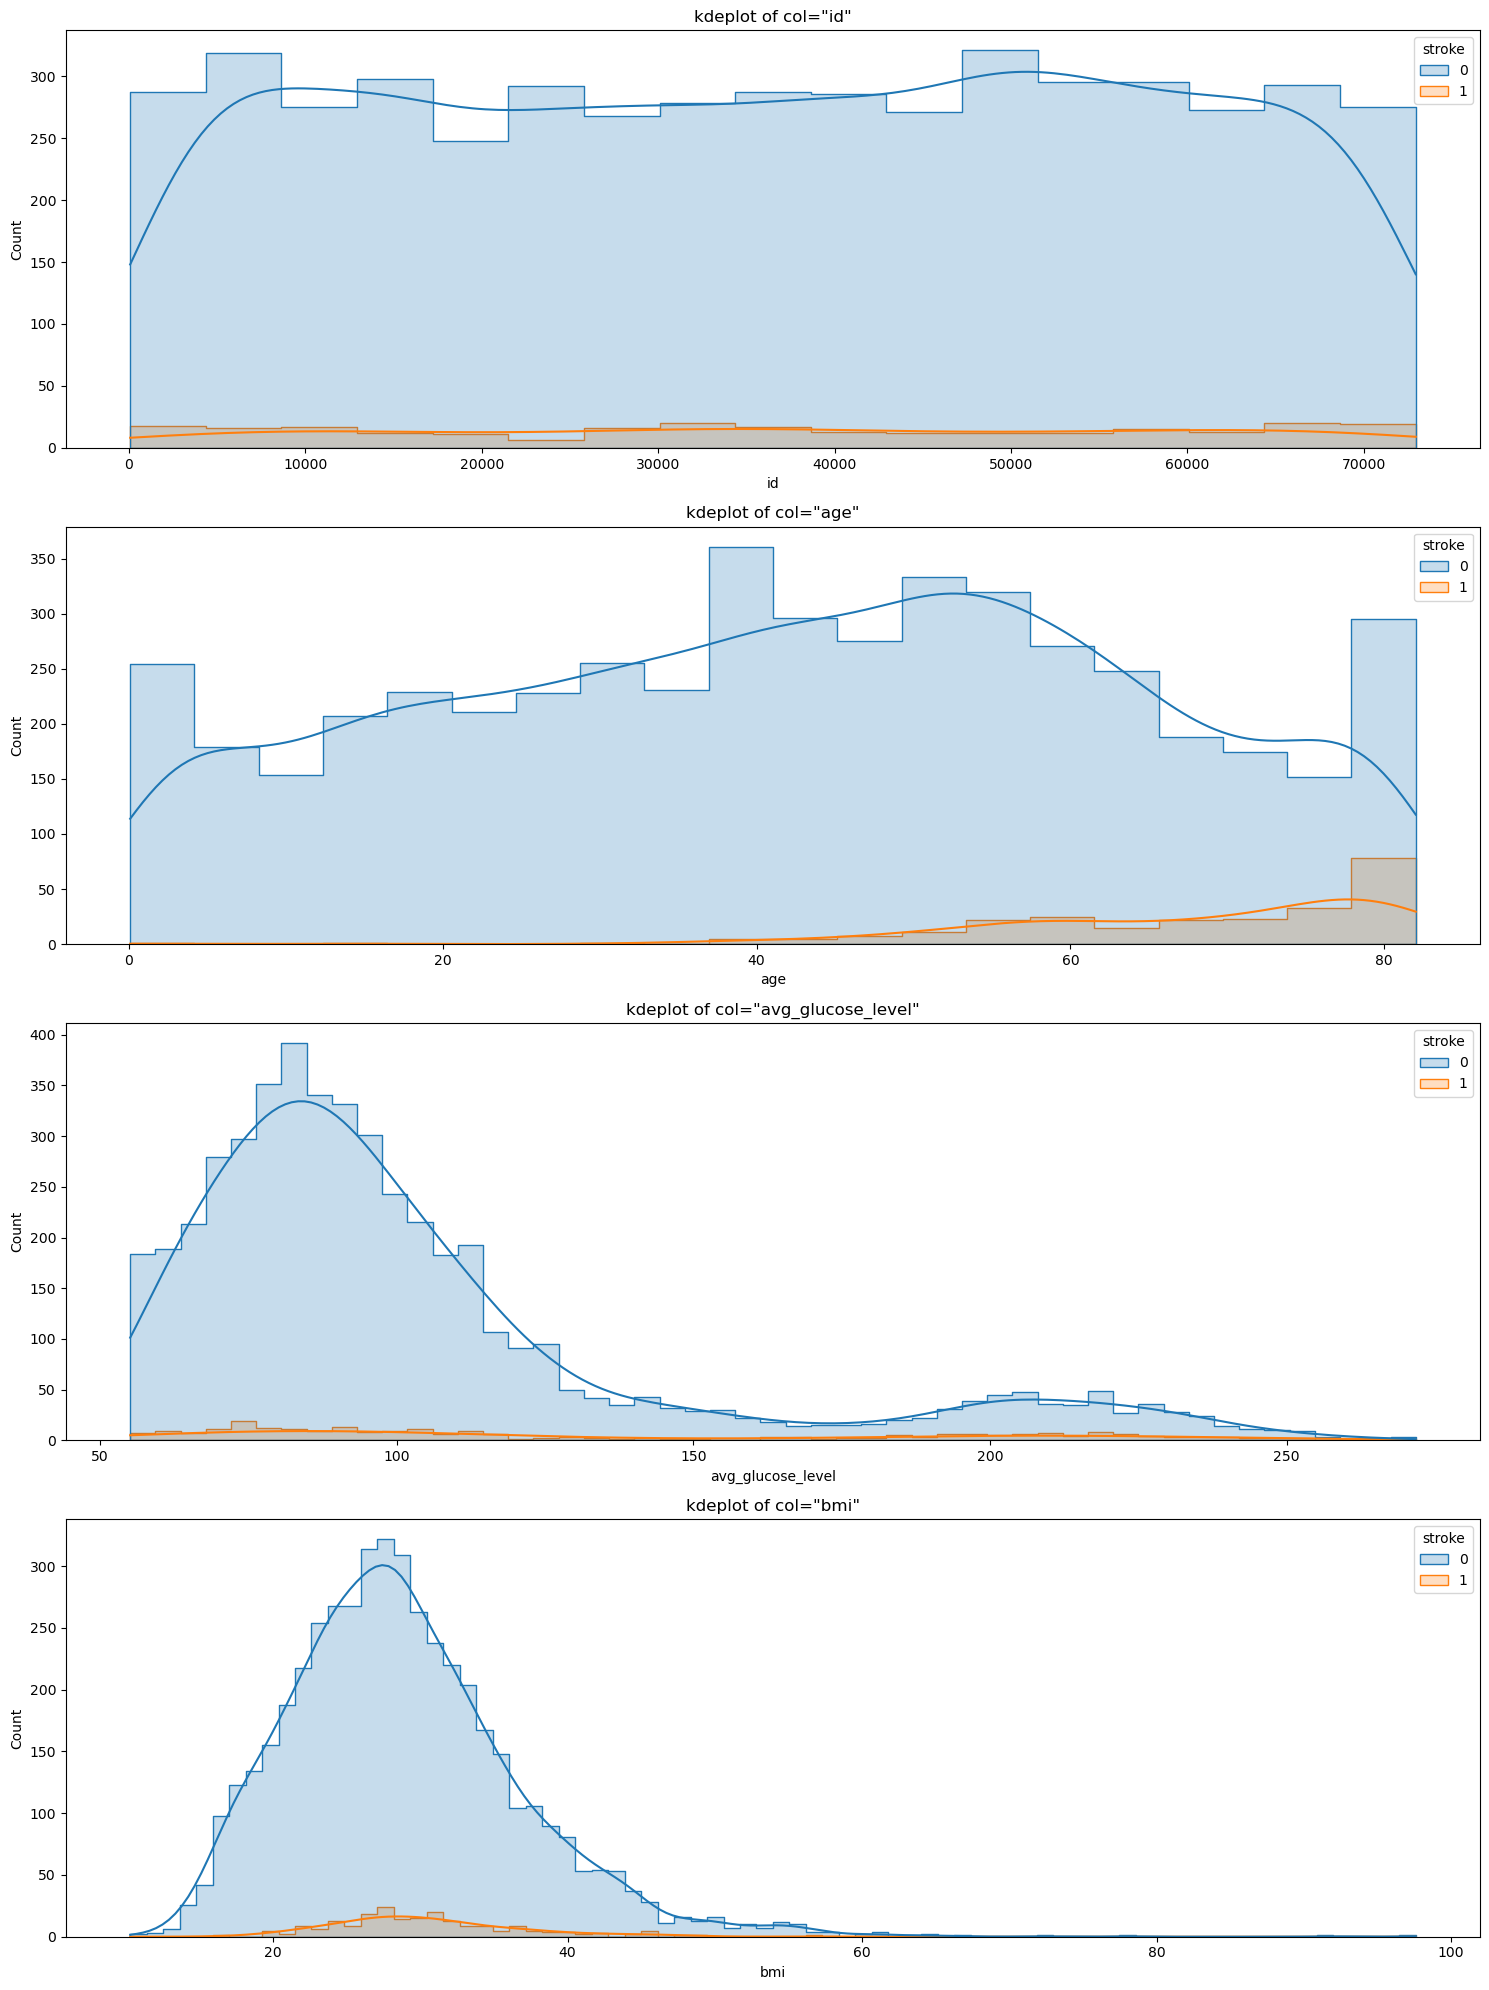

In [33]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### simple histogram, colored by target
    sns.histplot(data=data, x=col
                     , fill=True
                     , element="step"
                     , stat = 'count'# 'count','density','percent', ...
                     , discrete=False
                     , kde=True
                     
                     #, common_norm=False
                     
                     , hue = target # give color based on values of categorical target  
                     #, multiple = 'stack'
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

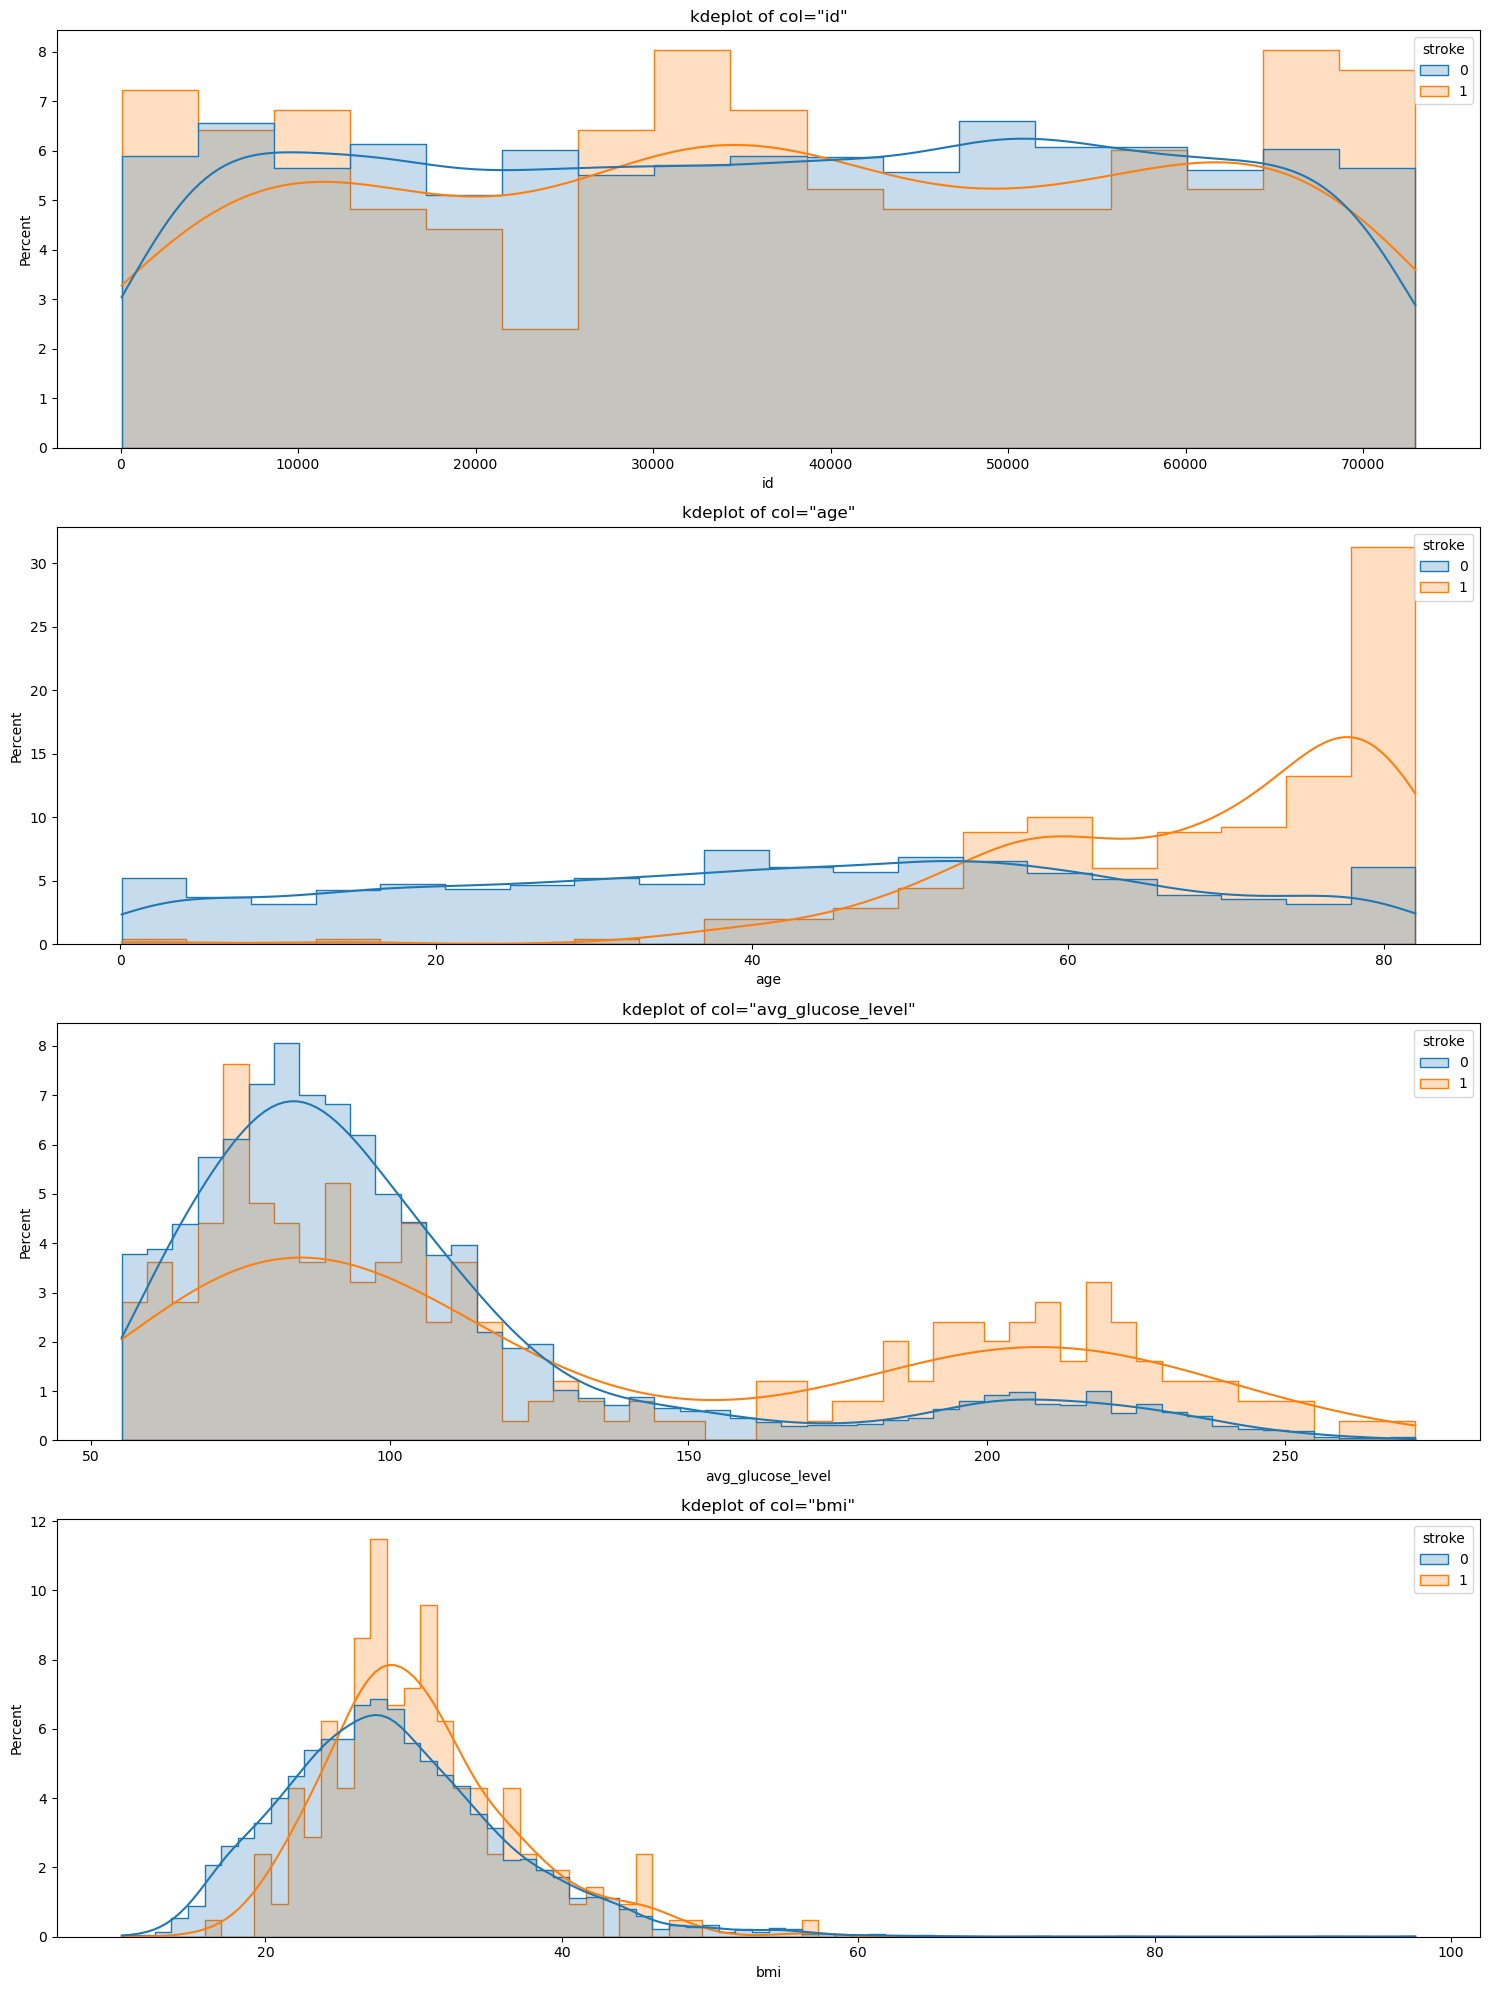

In [34]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a 'histogram'
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'kdeplot of col="{col}"')
    
    ### simple histogram, colored by target
    sns.histplot(data=data, x=col
                     , fill=True
                     , element="step"
                     , stat = 'percent' # 'count','density','percent', ...
                     , discrete=False
                     , kde=True
                     
                     , common_norm=False ## different references for stroke=0: sum = 100%, stroke=1 :sum= 100%
                                         ## relative representation/ conditional frequency
                     , hue = target # give color based on values of categorical target  
                     #, multiple = 'stack'
                     )

### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

In [35]:
### groupby-statistics

for col in num_cols:
    display(data[[col,target]].groupby(target).describe())

id                                                                \
         count          mean           std    min      25%      50%      75%   
stroke                                                                         
0       4861.0  36487.236371  21120.133386   67.0  17762.0  36958.0  54497.0   
1        249.0  37115.068273  21993.344872  210.0  17013.0  36706.0  56669.0   

                 
            max  
stroke           
0       72940.0  
1       72918.0

age                                                    
         count       mean        std   min   25%   50%   75%   max
stroke                                                            
0       4861.0  41.971545  22.291940  0.08  24.0  43.0  59.0  82.0
1        249.0  67.728193  12.727419  1.32  59.0  71.0  78.0  82.0

avg_glucose_level                                                       \
                   count        mean        std    min    25%     50%     75%   
stroke                                                                          
0                 4861.0  104.795513  43.846069  55.12  77.12   91.47  112.83   
1                  249.0  132.544739  61.921056  56.11  79.79  105.22  196.71   

                
           max  
stroke          
0       267.76  
1       271.74

bmi                                                   
         count       mean       std   min   25%   50%   75%   max
stroke                                                           
0       4700.0  28.823064  7.908287  10.3  23.4  28.0  33.1  97.6
1        209.0  30.471292  6.329452  16.9  26.4  29.7  33.7  56.6

__alternative visualisations: boxplot__

IQR = Q3-Q1 # Inter-Quartile Range

outlier = IF abs(x-median) > IQR*1.5 (by convention)

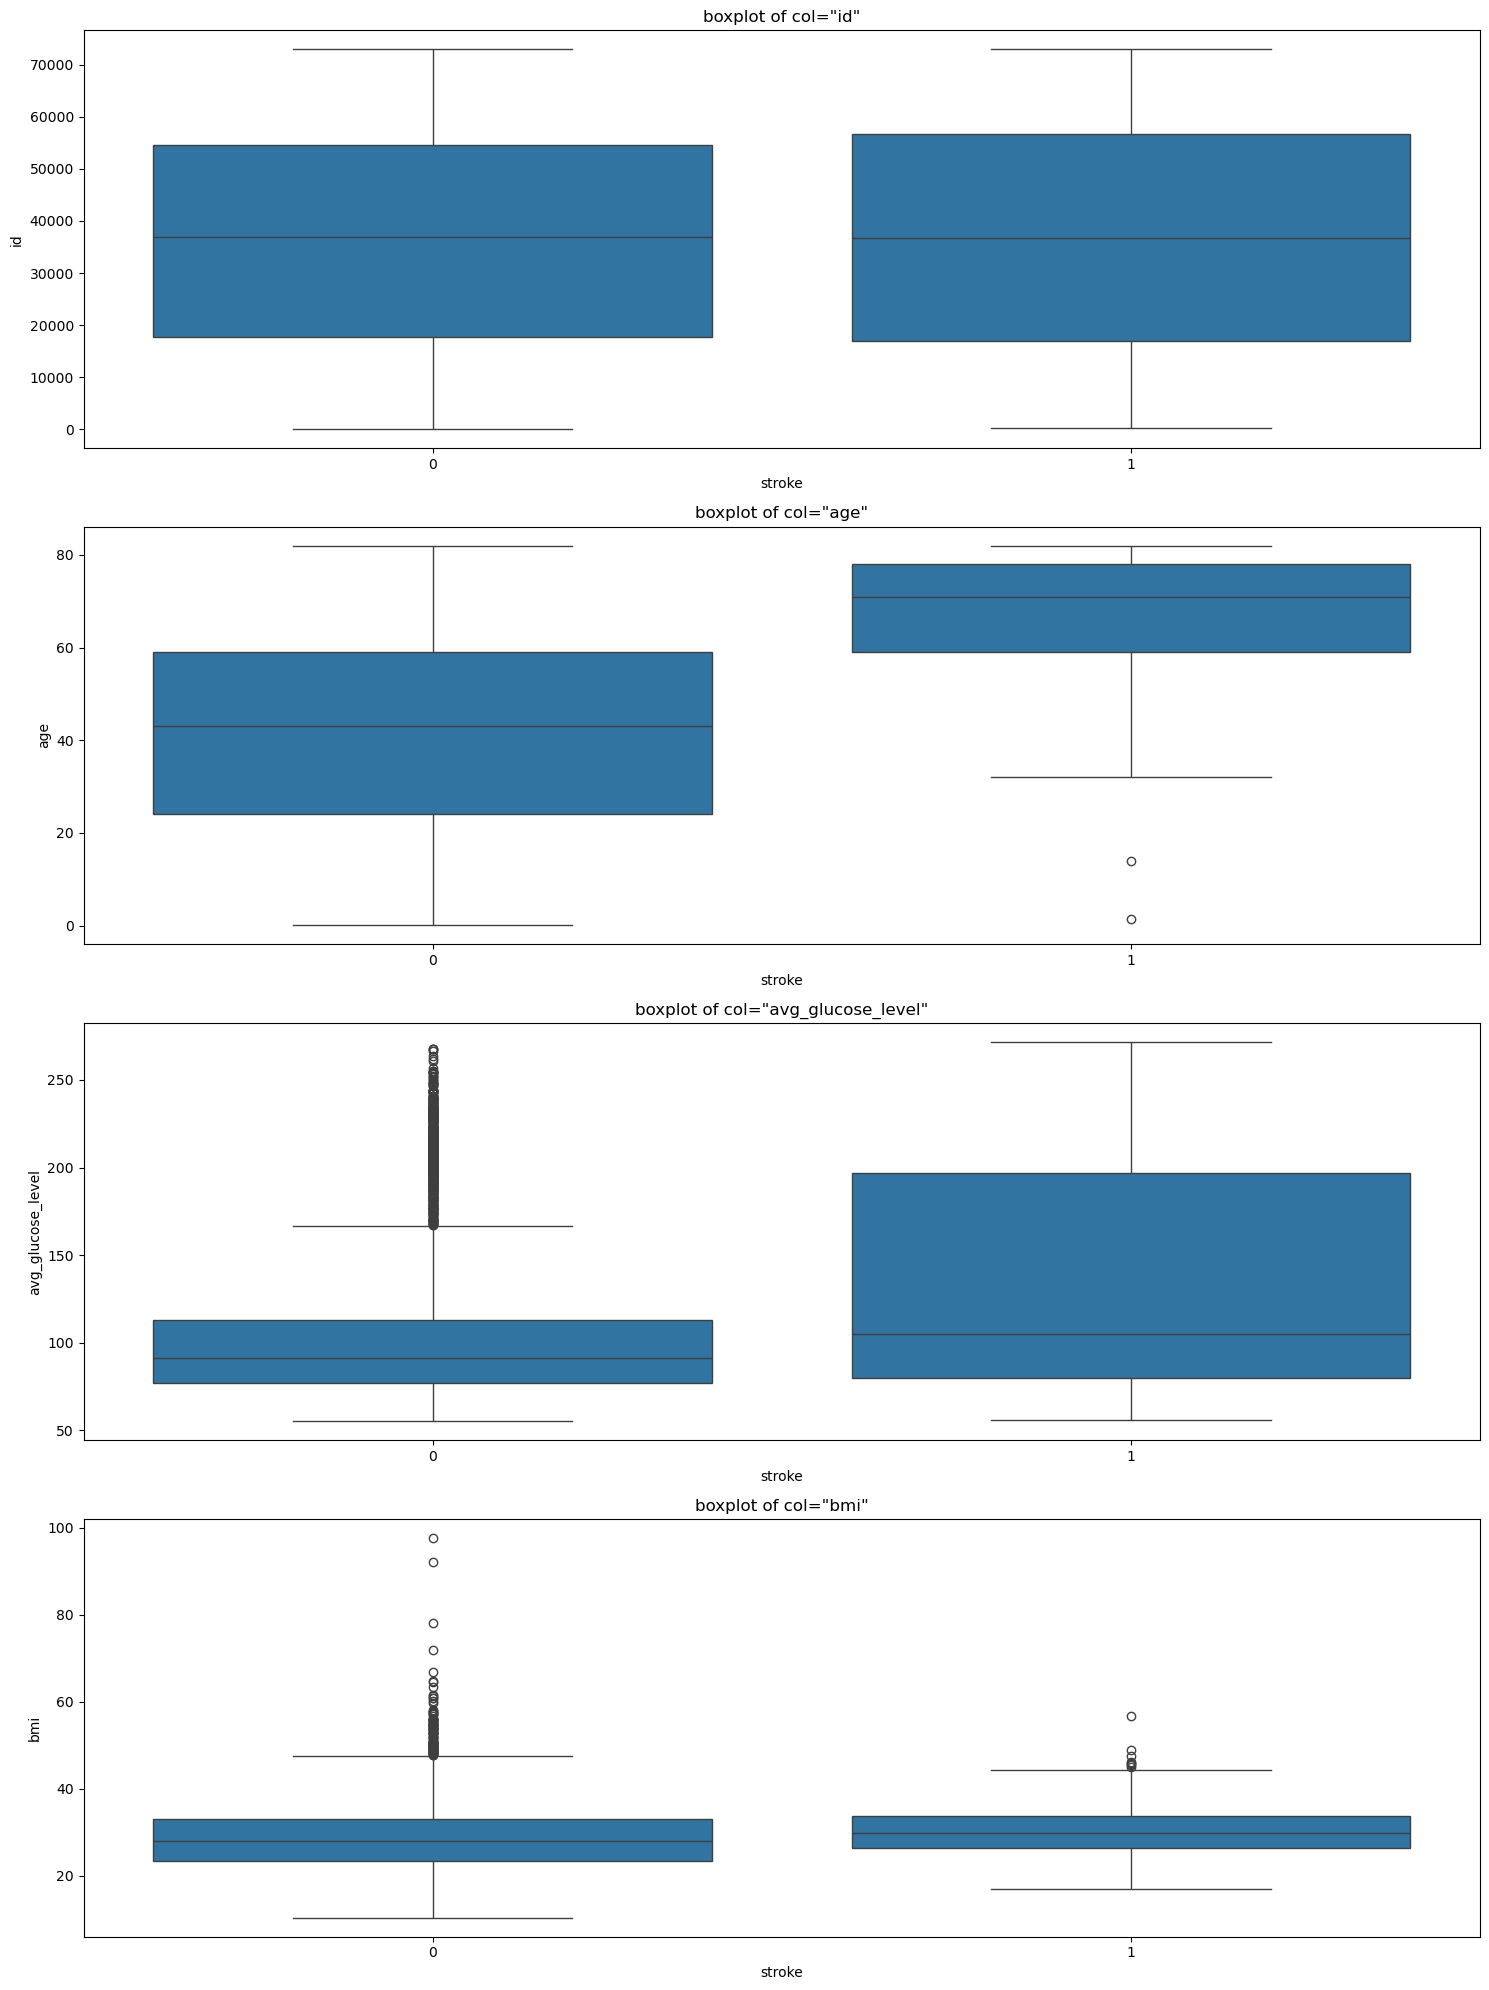

In [36]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 




### for each numerical feature plot a boxplot
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'boxplot of col="{col}"')
    
    ### boxplot uses Quartiles, median from data 
    sns.boxplot(data=data, x=target, y=col)
                    
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

__alternate visualisations: violin plot__

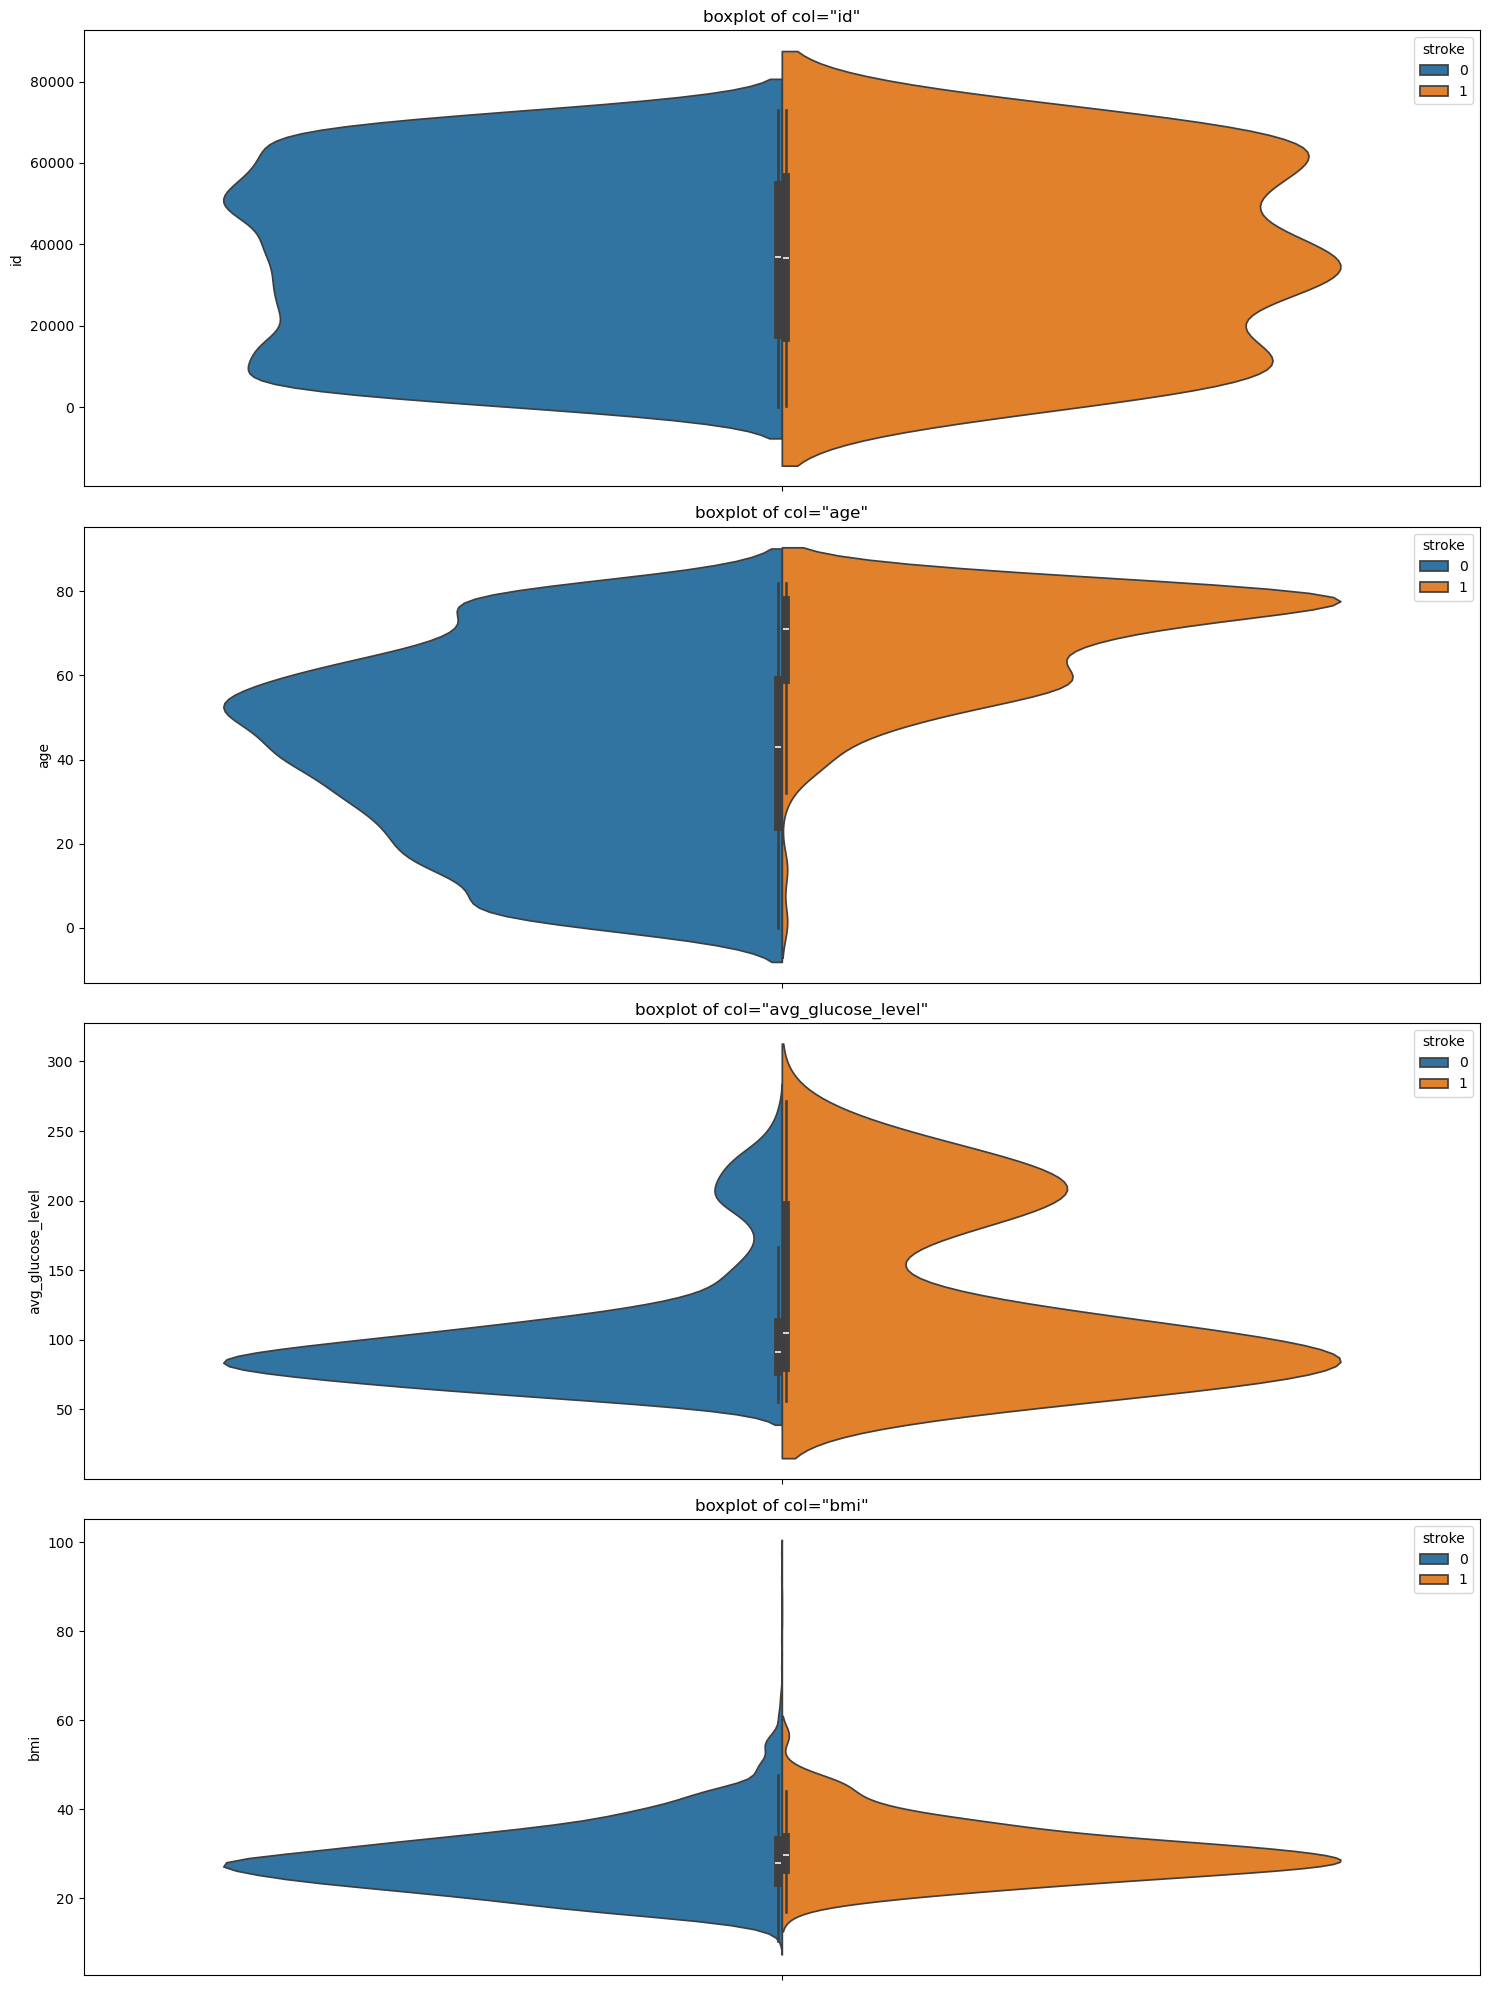

In [37]:
### number of numerical features
N_num = len(num_cols)

### height of figure depends on number of numerical features
plt.figure(figsize=(15, 5*N_num)) 


### for each numerical feature plot a violinplot
for i in np.arange(N_num):
    col = num_cols[i]
    
    plt.subplot(N_num, 1, i+1)
    plt.title(f'boxplot of col="{col}"')
    
    ### violinplot 
    sns.violinplot(data = data , hue=target, y=col , split=True)
                    
### prevent overlap, make bunch of graph look nicer when put together
plt.tight_layout()
#plt.plot()

### 3.c. Correlations

works only on numbers, not text

In [38]:
### show only correlations between my numerical/numerized features

data[[target]+num_cols].corr() # [target]+features : -> reorder columns

,stroke,id,age,avg_glucose_level,bmi
stroke,1.000000,0.006388,0.245257,0.131945,0.042374
id,0.006388,1.000000,0.003538,0.001092,0.003084
age,0.245257,0.003538,1.000000,0.238171,0.333398
avg_glucose_level,0.131945,0.001092,0.238171,1.000000,0.175502
bmi,0.042374,0.003084,0.333398,0.175502,1.000000


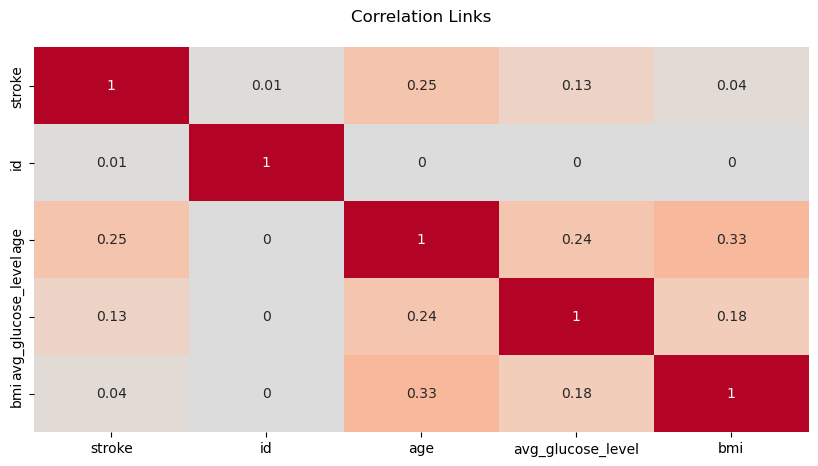

In [39]:


### put the same info in a graph
plt.figure(figsize=(10, 5))
plt.title('Correlation Links\n')


### heatmap with symetric table
sns.heatmap(data = data[[target]+num_cols].corr().round(2), ## corr('pearson') , corr('spearman')
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            cbar=False,
            annot=True,
           )
plt.show()


## 4. Multivariate content analysis
recommendations:

 - try pairplot where applicable
 - groupby where applicable
 - violinplot where applicable

there are no additional general recommendations,
    it depends mostly on context/meaning of the columns

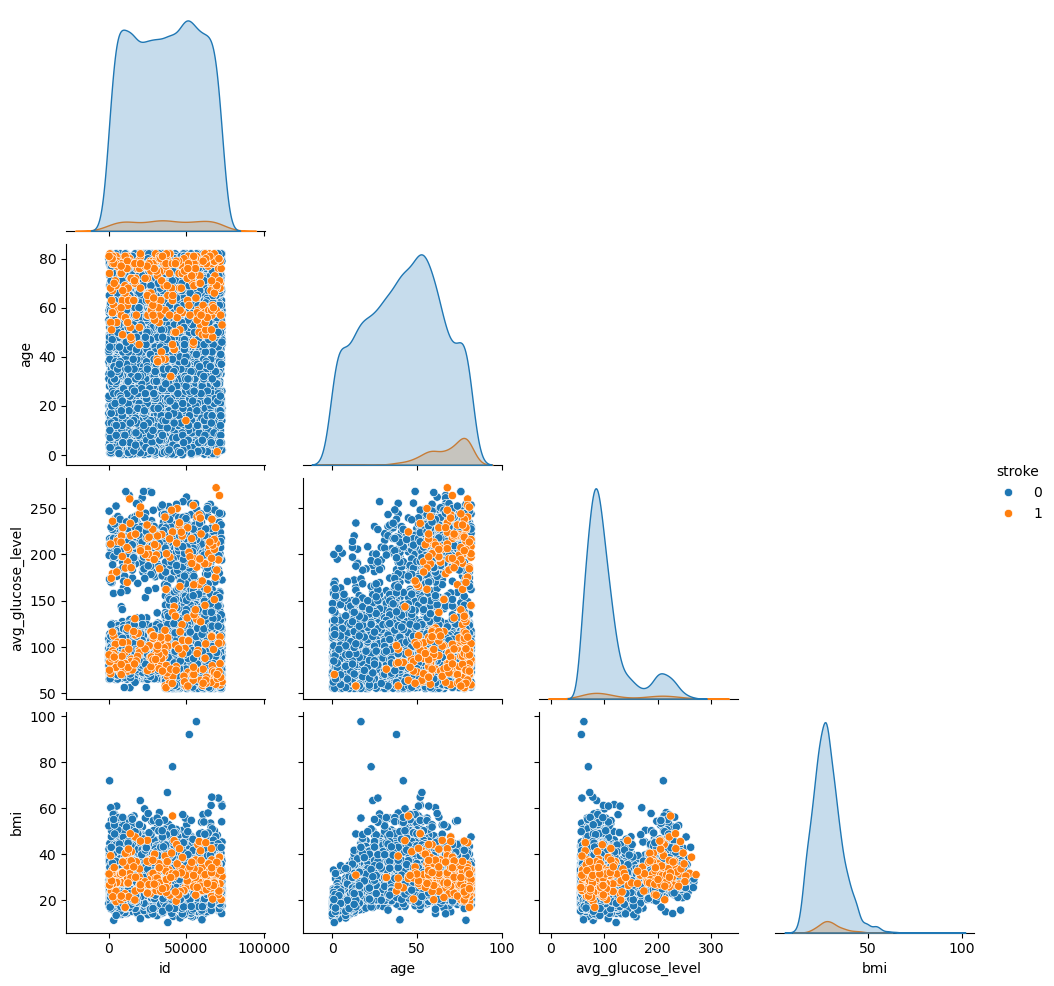

In [40]:
### the following pairplot provides a bunch of scatter plot between 
### all the combinations of 2 numerical features,
### while the color depends on the target values

#plt.figure(figsize=(30, 10))
sns.pairplot(data=data[num_cols+[target]].sort_values(by=target)
             , hue=target
             , corner=True
            )

plt.savefig('pairplot_stroke.pdf', dpi=300)
plt.show()

In [41]:
cat_cols, num_cols

(['smoking_status',
  'gender',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type'],
 ['id', 'age', 'avg_glucose_level', 'bmi'])

<Axes: xlabel='ever_married', ylabel='age'>

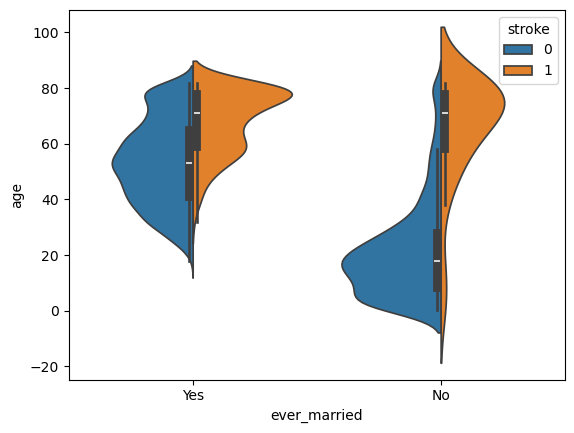

In [42]:
sns.violinplot(data=data
               ,x='ever_married'
               ,y='age'
               ,hue=target
               , split=True
              )

In [43]:
GB = data[['ever_married','smoking_status','gender',target]
    ].groupby(['ever_married','smoking_status','gender']
             ).agg({'stroke':['sum','count']})

GB_ = GB.reset_index().copy()
GB_.columns = ['ever_married','smoking_status','gender','stroke_sum','stroke_count']
GB_


,ever_married,smoking_status,gender,stroke_sum,stroke_count
0,No,Unknown,Female,6,458
1,No,Unknown,Male,2,443
2,No,formerly smoked,Female,3,87
3,No,formerly smoked,Male,0,59
4,No,formerly smoked,Other,0,1
5,No,never smoked,Female,10,335
6,No,never smoked,Male,5,195
7,No,smokes,Female,2,113
8,No,smokes,Male,1,66
9,Yes,Unknown,Female,19,378


In [44]:
GB_['ratio'] = GB_['stroke_sum']/GB_['stroke_count']*100
GB_.sort_values(by='ratio',ascending=False)

,ever_married,smoking_status,gender,stroke_sum,stroke_count,ratio
12,Yes,formerly smoked,Male,36,348,10.344828
16,Yes,smokes,Male,22,271,8.118081
11,Yes,formerly smoked,Female,31,390,7.948718
10,Yes,Unknown,Male,20,265,7.547170
13,Yes,never smoked,Female,53,894,5.928412
9,Yes,Unknown,Female,19,378,5.026455
15,Yes,smokes,Female,17,339,5.014749
14,Yes,never smoked,Male,22,468,4.700855
2,No,formerly smoked,Female,3,87,3.448276
5,No,never smoked,Female,10,335,2.985075


In [45]:
data['>50'] = data['age'] > 50


In [46]:
GB2 = data[['ever_married','smoking_status','gender',target,">50"]
    ].groupby(['gender','>50','ever_married','smoking_status']
             ).agg({'stroke':['sum','count','mean']})
GB2.reset_index(inplace=True)

GB2.sort_values(by=[('stroke','mean')],ascending=False)

gender    >50 ever_married   smoking_status stroke                
                                                   sum count      mean
8   Female   True           No          Unknown      4    18  0.222222
10  Female   True           No     never smoked     10    48  0.208333
26    Male   True           No     never smoked      4    22  0.181818
24    Male   True           No          Unknown      2    12  0.166667
31    Male   True          Yes           smokes     22   150  0.146667
11  Female   True           No           smokes      2    14  0.142857
29    Male   True          Yes  formerly smoked     35   268  0.130597
28    Male   True          Yes          Unknown     18   155  0.116129
13  Female   True          Yes  formerly smoked     28   259  0.108108
14  Female   True          Yes     never smoked     47   484  0.097107
12  Female   True          Yes          Unknown     19   211  0.090047
9   Female   True           No  formerly smoked      2    24  0.083333
30    Male   True          Yes     never smoked     21   277  0.075812
15  Female   True          Yes           smokes     12   160  0.075000
7   Female  False          Yes           smokes      5   179  0.027933
5   Female  False          Yes  formerly smoked      3   131  0.022901
19    Male  False           No           smokes      1    54  0.018519
20    Male  False          Yes          Unknown      2   110  0.018182
1   Female  False           No  formerly smoked      1    63  0.015873
6   Female  False          Yes     never smoked      6   410  0.014634
21    Male  False          Yes  formerly smoked      1    80  0.012500
18    Male  False           No     never smoked      1   173  0.005780
22    Male  False          Yes     never smoked      1   191  0.005236
0   Female  False           No          Unknown      2   440  0.004545
27    Male   True           No           smokes      0    12  0.000000
16    Male  False           No          Unknown      0   431  0.000000
25    Male   True           No  formerly smoked      0    13  0.000000
23    Male  False          Yes           smokes      0   121  0.000000
17    Male  False           No  formerly smoked      0    46  0.000000
4   Female  False          Yes          Unknown      0   167  0.000000
3   Female  False           No           smokes      0    99  0.000000
2   Female  False           No     never smoked      0   287  0.000000
32   Other  False           No  formerly smoked      0     1  0.000000